# Learn representation

Trains a simple fully-connected neural network on electronic 
health records using treatment assignment as target, and
extracts activations from the last layer. This notebook also does some hyperparameter tuning on the
network.

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from utils.data import load_data
from utils.nn import (
    add_fully_connected, 
    precision_recall,
    add_criteria,
    extract_activations
)

In [2]:
# Load data
datasets = load_data()
dim = datasets.dimension

In [3]:
# Instantiate session and create base variables
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, dim])
y_ = tf.placeholder(tf.float32, shape=[None, 2])

In [6]:
# Hidden layers dimensions
hidden1 = 500
hidden2 = 50
hidden3 = 3

# Actual network creation
h1 = add_fully_connected(x, dim, hidden1, relu=False)
h2 = add_fully_connected(h1, hidden1, hidden2, tanh=True)
h3 = add_fully_connected(h1, hidden1, hidden3, tanh=False)
y_scores = add_fully_connected(h3, hidden3, 2, tanh=False)

cross_entropy, train_step, correct_prediction, accuracy = add_criteria(y_, y_scores, 7.5e-7)

Step 0: 0.507867
Step 1000: 0.549825
Step 2000: 0.592657
Step 3000: 0.63549
Step 4000: 0.65472
Step 5000: 0.675699
Step 6000: 0.690559
Step 7000: 0.703671
Step 8000: 0.712413
Step 9000: 0.722028
Step 10000: 0.730769
Step 11000: 0.736014
Step 12000: 0.740385
Step 13000: 0.749126
Step 14000: 0.752622
Step 15000: 0.753497
Step 16000: 0.755245
Step 17000: 0.757867
Step 18000: 0.758741
Step 19000: 0.757867
Step 20000: 0.759615
Step 21000: 0.763986
Step 22000: 0.768357
Step 23000: 0.768357
Step 24000: 0.768357
Step 25000: 0.772727
Step 26000: 0.772727
Step 27000: 0.774476
Step 28000: 0.777972
Step 29000: 0.780594
Step 30000: 0.784091
Step 31000: 0.784965
Step 32000: 0.787587
Step 33000: 0.787587
Step 34000: 0.789336
Step 35000: 0.789336
Step 36000: 0.79021
Step 37000: 0.789336
Step 38000: 0.789336
Step 39000: 0.789336
Step 40000: 0.791958
Step 41000: 0.792832
Step 42000: 0.793706
Step 43000: 0.792832
Step 44000: 0.79458
Step 45000: 0.796329
Step 46000: 0.795455
Step 47000: 0.797203
Step 4800

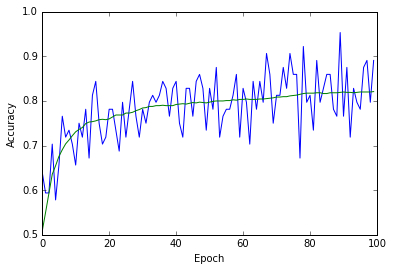

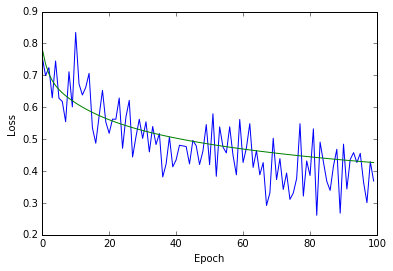

In [7]:
# Keep history to plot accuracies
train_acc = []
val_acc = []
train_losses = []
val_losses = []

# Actually train data
sess.run(tf.initialize_all_variables())

for i in range(100000):
    batch = datasets.train.next_batch(64)
    if i % 1000 == 0:
        train_accuracy = accuracy.eval(
            feed_dict={x: batch[0], y_: batch[1]}
        )
        val_accuracy = accuracy.eval(
            feed_dict={x: datasets.val1._patients, 
                       y_: datasets.val1._labels}
        )
        train_loss = cross_entropy.eval(
            feed_dict={x: batch[0], y_: batch[1]}            
        )
        val_loss = cross_entropy.eval(
            feed_dict={x: datasets.val1._patients, 
                       y_: datasets.val1._labels}            
        )
        train_acc.append(train_accuracy)
        val_acc.append(val_accuracy)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        print "Step %d:" % i, val_accuracy
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

print("Validation accuracy %g" % accuracy.eval(
    feed_dict={x: datasets.val1._patients, y_: datasets.val1._labels}
))

# Plot learning curves
plt.figure(1)
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.figure(2)
plt.plot(train_losses)
plt.plot(val_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")

# print "Precision, Recall:", precision_recall(x, y_, y_scores, datasets.val1)

In [8]:
# Extract activations
extract_activations(x, y_, y_scores, datasets.train, "train_small_3")
extract_activations(x, y_, y_scores, datasets.val1, "val1_small_3")
extract_activations(x, y_, y_scores, datasets.val2, "val2_small_3")
extract_activations(x, y_, y_scores, datasets.test, "test_small_3")